# 0. 라이브러리 가져오기

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Common imports
import os
import numpy as np
import pandas as pd

# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline

# 1. 데이터 불러오기

[Predciting Food Delivery Time](https://www.kaggle.com/ramprasad273/predicting-food-delivery-time)

In [2]:
def load_data(data_path):
    csv_path = os.path.join(data_path)
    return pd.read_csv(csv_path)

In [3]:
input_path = './predict_delivery_time.csv'
delivery = load_data(input_path)

# 2. 데이터 구조 훓어보기

### 필드(Column) 설명

- Restaurant: A unique ID that represents a restaurant.          (식당의 고유 ID)
- Location: The location of the restaurant.                      (식당의 위치)
- Cuisines: The cuisines offered by the restaurant.              (식당에서 제공하는 요리의 종류)
- AverageCost: The average cost for one person/order.            (한 사람/주문 당 평균 주문 가격)
- MinimumOrder: The minimum order amount.                        (최소 배달 금액)
- Rating: Customer rating for the restaurant.                    (식당에 대한 손님들의 별점)
- Votes: The total number of customer votes for the restaurant.  (투표에 참여한 손님의 수)
- Reviews: The number of customer reviews for the restaurant.    (식당에 대해 손님들이 작성한 리뷰의 수)
- DeliveryTime: The order delivery time of the restaurant.       (타겟, 배달 시간) (Target Classes)

In [4]:
delivery.head()

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
0,ID6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30
1,ID2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30
2,ID1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65
3,ID5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30
4,ID6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65


In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    11094 non-null  object 
 1   Location      11094 non-null  object 
 2   Cuisines      11094 non-null  object 
 3   AverageCost   11094 non-null  object 
 4   MinimumOrder  11094 non-null  int64  
 5   Rating        9903 non-null   object 
 6   Votes         9020 non-null   float64
 7   Reviews       8782 non-null   float64
 8   DeliveryTime  11094 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 780.2+ KB


- 범주형(categorical) 필드 : Restaurant, Location, Cuisines, AverageCost, Rating
- 숫자형 필드 : MinimumOrder, Votes, Reviews, DeliveryTime

- NULL 값 : Rating, Votes, Reviews

In [6]:
cat_columns  = ['Restaurant', 'Location', 'Cuisines', 'AverageCost', 'Rating']
num_columns  = ['MinimumOrder', 'Votes', 'Reviews', 'DeliveryTime']

In [7]:
# Number of unique values for each column
print("< Number of Unique Values per Columns >")
for c in delivery.columns : #{
    print(c, delivery[c].nunique())
#}

< Number of Unique Values per Columns >
Restaurant 7480
Location 35
Cuisines 2179
AverageCost 26
MinimumOrder 18
Rating 32
Votes 1102
Reviews 760
DeliveryTime 7


## 범주형 필드 

In [8]:
for c in cat_columns : #{
    print('\n>>', c)
    print(delivery[c].value_counts())
#}


>> Restaurant
ID7184    22
ID7295    20
ID4625    20
ID5321    19
ID5538    19
          ..
ID2383     1
ID8117     1
ID3799     1
ID7118     1
ID3537     1
Name: Restaurant, Length: 7480, dtype: int64

>> Location
Mico Layout, Stage 2, BTM Layout,Bangalore          947
DBlock, Sector 63, Noida                            806
Sector 1, Noida                                     791
FTI College, Law College Road, Pune                 584
Delhi UniversityGTB Nagar                           545
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    493
Sector 14, Noida                                    489
Delhi Administration Flats, Timarpur                472
Mumbai Central                                      459
Rmz Centennial, I Gate, Whitefield                  457
Delhi High Court, India Gate                        411
MG Road, Pune                                       402
Nathan Road, Mangaldas Road, Pune                   372
Sandhurst Road, Mumbai CST Area                     370


## 숫자형 필드

In [9]:
delivery.describe()

,MinimumOrder,Votes,Reviews,DeliveryTime
count,11094.000000,9020.000000,8782.000000,11094.000000
mean,53.344511,244.544457,123.247893,37.056066
std,18.551245,555.094733,321.025216,12.447496
min,0.000000,3.000000,1.000000,10.000000
25%,50.000000,19.000000,7.000000,30.000000
50%,50.000000,63.000000,26.000000,30.000000
75%,50.000000,216.000000,91.000000,45.000000
max,500.000000,9054.000000,6504.000000,120.000000


In [10]:
for c in num_columns : #{
    print('\n>>', c)
    print(delivery[c].value_counts())
#}


>> MinimumOrder
50     10118
99       779
0        158
200        8
199        8
299        3
350        3
59         3
90         2
450        2
300        2
79         2
89         1
250        1
400        1
240        1
500        1
150        1
Name: MinimumOrder, dtype: int64

>> Votes
4.0       248
6.0       200
7.0       182
9.0       181
5.0       176
         ... 
2164.0      1
258.0       1
561.0       1
2139.0      1
1159.0      1
Name: Votes, Length: 1102, dtype: int64

>> Reviews
2.0       420
3.0       387
1.0       381
4.0       356
5.0       256
         ... 
704.0       1
343.0       1
1225.0      1
1073.0      1
1159.0      1
Name: Reviews, Length: 760, dtype: int64

>> DeliveryTime
30     7406
45     2665
65      923
120      62
20       20
80       14
10        4
Name: DeliveryTime, dtype: int64


# 3. 테스트 데이터셋 만들기

전체 데이터 중 랜덤하게 20%를 추출하여 테스트 데이터로 분리

In [11]:
random_seed = 42
np.random.seed(random_seed)

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(delivery, test_size=0.2, random_state=random_seed)

# 4. 데이터 이해를 위한 탐색과 시각화

In [13]:
delivery = train_set.copy()

### 상관관계 관찰하기

- Votes와 Reviews는 양의 상관관계를 가지고 있다.

In [14]:
delivery.corr()

,MinimumOrder,Votes,Reviews,DeliveryTime
MinimumOrder,1.000000,0.136604,0.136823,0.257467
Votes,0.136604,1.000000,0.966180,0.211054
Reviews,0.136823,0.966180,1.000000,0.185067
DeliveryTime,0.257467,0.211054,0.185067,1.000000


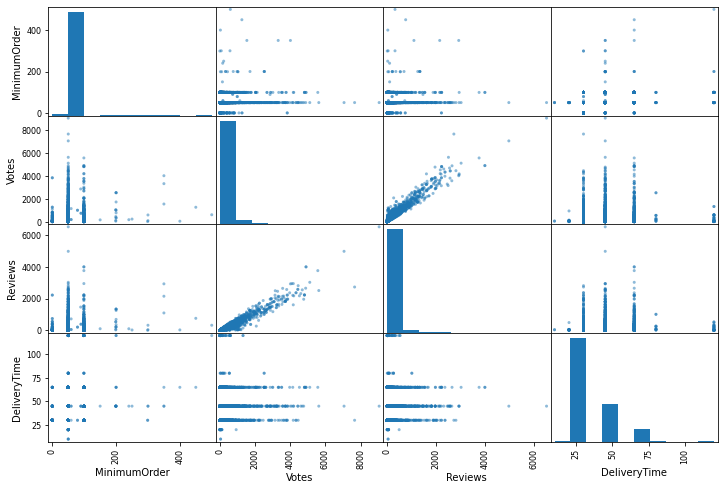

In [15]:
from pandas.plotting import scatter_matrix

# 특성 몇 개만 살펴봄
scatter_matrix(delivery[num_columns], figsize=(12, 8))
plt.show()

# 5. 머신러닝 알고리즘을 위한 데이터 준비

## 데이터와 레이블 분리

- Label Column : DeliveryTime

In [16]:
delivery = train_set.drop("DeliveryTime", axis=1) # drop labels
delivery_labels = train_set["DeliveryTime"].copy()

In [17]:
delivery.head()

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews
11025,ID304,"Rmz Centennial, I Gate, Whitefield","North Indian, Andhra, BBQ, Seafood, Chinese",350,50,3.8,160.0,73.0
1684,ID4157,"FTI College, Law College Road, Pune","European, Italian, Continental, Salad, Beverages",600,50,4.0,646.0,370.0
499,ID2772,"Sector 63A,Gurgaon","Chinese, Continental, Italian, Healthy Food, A...",200,50,3.1,41.0,25.0
5770,ID1834,"FTI College, Law College Road, Pune","Bakery, Cafe, Desserts",100,50,4.0,231.0,123.0
8290,ID3496,"Mico Layout, Stage 2, BTM Layout,Bangalore","Chinese, North Indian",150,50,NaN,NaN,NaN


## 데이터 정제 (Data Cleaning)

### 범주형 데이터에 대해 자세히 알아보기

- AverageCost : 'for'을 제외하고는 정수(int)
- Rating      : ('NEW', 'Opening Soon', 'Temporarily Closed')을 제외하고는 실수(float)
- Location, Cuisines : 한 칸에 다중값이 있으므로 ','를 기준으로 값을 분류하여 각 값을 새로운 Column이 되도록 함.(해당 값이 있으면 1, 없으면 0)

In [18]:
delivery['AverageCost'].unique()

array(['350', '600', '200', '100', '150', '250', '300', '50', '800',
       '400', '750', '500', '450', '650', '550', '700', '1,000', '850',
       '1,200', '900', '2,050', '950', '1,150', '1,100', 'for'],
      dtype=object)

In [19]:
delivery['Rating'].unique()

array(['3.8', '4.0', '3.1', nan, '3.6', '3.0', '3.5', '4.3', 'NEW', '4.1',
       '3.7', '2.8', '2.6', '3.4', '2.9', '3.2', '3.3', '3.9', '4.5',
       '2.7', '4.4', '4.2', '2.4', '4.7', '2.3', '4.8', 'Opening Soon',
       '4.6', '4.9', '2.5', '2.1', 'Temporarily Closed', '2.2'],
      dtype=object)

In [20]:
df_locations = delivery['Location'].str.get_dummies(", ")
df_locations

,BTM Layout 1,"BTM Layout,Bangalore",Babarpur,Begumpet,Chandni Chowk,Chatta Bazaar,DBlock,Delhi,Delhi Administration Flats,Delhi Cantt.,...,Sector 3A,Sector 63,"Sector 63A,Gurgaon",Stage 2,Tejas Nagar Colony,Timarpur,Tiretti,Wadala West,Whitefield,Yerawada
11025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8290,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5191,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_cuisines = delivery['Cuisines'].str.get_dummies(", ")
df_cuisines

,Afghan,African,American,Andhra,Arabian,Asian,Awadhi,BBQ,Bakery,Bangladeshi,...,Street Food,Sushi,Tamil,Tea,TexMex,Thai,Tibetan,Turkish,Vietnamese,Wraps
11025,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5770,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 변환 파이프라인을 활용해 데이터 전처리 Pipeline 생성

### 필드(Column)별 속성 분석

#### (1) 범주형 필드
- Restaurant  : OrdinalEncoding 후, MinMaxScaler를 적용
- Location    : 다중값을 갖음, ','를 기준으로 값을 분리하여 하나의 값이 새로운 Column으로 생성(OneHotEncoding과 유사, 해당하는 값이 있을 경우 1, 없을 경우 0), 
- Cuisines    : 다중값을 갖음. ','를 기준으로 값을 분리하여 하나의 값이 새로운 Column으로 생성
- AverageCost : 대부분 정수, 'for'이라는 값을 갖고 있는 열이 있어 해당 값을 중간값으로 설정, 나머지를 정수로 변환. 이상값에 영향을 덜 받는 RobustScaler 적용
- Rating      : 대부분 실수, ('NEW', 'Opening Soon', 'Temporarily Closed')를 가지고 있는 열에 대해 0으로 설정, 나머지는 실수로 변환

#### (2) 숫자형 필드
- MinimumOrder : 정수(Int)  , StandardScaler 적용
- Votes        : 실수(Float), StandardScaler 적용
- Reviews      : 실수(Float), StandardScaler 적용
- DeliveryTime : 정수(Int)

#### (3) 결측치 존재 필드
- AverageCost            : 중간값으로 설정 
- Rating, Votes, Reviews : 손님들의 평가가 존재하지 않으므로 0으로 설정

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class SplitAndOneHot(BaseEstimator, TransformerMixin) : #{
    def fit(self, X, y=None) : #{ 
        return self
    #}
    
    def transform(self, X) : #{
        new_X = X.drop(['Location', 'Cuisines'], axis=1)
        
        return np.c_[new_X, X['Location'].str.get_dummies(", "), X['Cuisines'].str.get_dummies(", ")]
    #}
#}

class ConvertStringToNum(BaseEstimator, TransformerMixin) : #{
    def fit(self, X, y=None) : #{
        return self
    #}
    
    def transform(self, X) : #{
        
        X['AverageCost'] = X['AverageCost'].apply(lambda x : np.nan if x == 'for' else int(x.replace(',','')))
        avgcost_median   = X['AverageCost'].median()
        X['AverageCost'].fillna(avgcost_median, inplace=True)
        
        X_avg_cost       = X[['AverageCost']]
        robust_scaler    = RobustScaler()
        X['AverageCost'] = robust_scaler.fit_transform(X_avg_cost)
        
        
        X['Rating']      = X['Rating'].apply(lambda x: np.nan if x in ['NEW', 'Opening Soon', 'Temporarily Closed'] else float(x))
        X['Rating'].fillna(0, inplace=True)

        return X
    #}
#}

In [23]:
ordinalEncoding_cols  = ['Restaurant']
split_OHEncoding_cols = ['Location', 'Cuisines']
string_to_num_cols    = ['AverageCost', 'Rating']
zero_cols             = ['Votes', 'Reviews']
median_cols           = ['MinimumOrder']

num_cols              = ['MinimumOrder', 'Votes', 'Reviews']
max_length            = delivery['Restaurant'].nunique()

## Train Data에 없는 Restaurant가 Test Data에 있을 경우 Restaurant.nunique()로 설정
ord_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=max_length)),
    ("minmax_scaler", MinMaxScaler()),
])

median_pipeline = Pipeline([
    ("imputer_median", SimpleImputer(strategy="median")),
    ("std_scaler"    , StandardScaler()),
])

zero_pipeline = Pipeline([
    ("imputer_zero", SimpleImputer(strategy="constant", fill_value=0)),
    ("std_scaler"  , StandardScaler()),
])



full_pipeline = ColumnTransformer([
    ("ordinal_encoding", ord_pipeline        , ordinalEncoding_cols),
    ("onehot_encoding" , SplitAndOneHot()    , split_OHEncoding_cols),
    ("string_to_num"   , ConvertStringToNum(), string_to_num_cols),
    ("fill_median"     , median_pipeline     , median_cols),
    ("fill_zero"       , zero_pipeline       , zero_cols),
])

In [24]:
delivery_prepared = full_pipeline.fit_transform(delivery)

### 데이터 전처리 후 DataFrame으로 만들기

- DeliveryTime과의 상관관계 : 필드가 많은 만큼 상관관계 값들이 크지 않음을 확인할 수 있다.

In [25]:
cuisines_cols = delivery['Cuisines'].str.get_dummies(", ").columns
location_cols = delivery['Location'].str.get_dummies(", ").columns
new_OHEncodint_cols = list(cuisines_cols) + list(location_cols)

In [26]:
columns = ordinalEncoding_cols + new_OHEncodint_cols + string_to_num_cols + num_cols
delivery_preprocessed = pd.DataFrame(
    delivery_prepared,
    columns=columns,
    index=delivery.index
)
delivery_preprocessed['DeliveryTime'] = delivery_labels
delivery_preprocessed.head()

,Restaurant,Afghan,African,American,Andhra,Arabian,Asian,Awadhi,BBQ,Bakery,...,Tiretti,Wadala West,Whitefield,Yerawada,AverageCost,Rating,MinimumOrder,Votes,Reviews,DeliveryTime
11025,0.258308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,3.8,-0.181559,-0.077149,-0.086960,45
1684,0.399118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,-0.181559,0.893902,0.963553,45
499,0.223972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.1,-0.181559,-0.314917,-0.256739,45
5770,0.107576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,4.0,-0.181559,0.064712,0.089894,45
8290,0.316270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.5,0.0,-0.181559,-0.396837,-0.345166,30


In [27]:
delivery_preprocessed.corr()["DeliveryTime"].sort_values(ascending=False)[1:10]

MinimumOrder    0.257467
Rating          0.239312
Votes           0.238653
Reviews         0.213701
AverageCost     0.182419
North Indian    0.155732
Marathalli      0.077768
Timarpur        0.077183
Sushi           0.074241
Name: DeliveryTime, dtype: float64

In [28]:
delivery_preprocessed.corr()["DeliveryTime"].sort_values(ascending=True)[:5]

Healthy Food       -0.070157
American           -0.070157
BBQ                -0.070157
Charcoal Chicken   -0.057844
Bihari             -0.057844
Name: DeliveryTime, dtype: float64

# 6. 모델 훈련 (Train a Model)

### 모델 : RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=random_seed)
forest_reg.fit(delivery_prepared, delivery_labels)

RandomForestRegressor(random_state=42)

### 교차 검증(Cross-Validation)을 사용한 평가

In [30]:
def display_scores(scores) : #{
    print("Scores :", scores)
    print("Mean :", scores.mean())
    print("Standard Deviation :", scores.std())
#}

In [31]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, delivery_prepared, delivery_labels,
                        scoring="neg_mean_absolute_error", cv=10)  ## absolute / squared
forest_rmse_scores = np.sqrt(-forest_scores)
forest_abs_scores  = -forest_scores
display_scores(forest_abs_scores)

Scores : [5.94459459 5.36024775 5.5973536  5.74656532 5.41869369 5.71708005
 5.90789177 6.30693348 6.13866967 5.58844419]
Mean : 5.772647412068212
Standard Deviation : 0.2882835830484732


# 7. 모델 세부 튜닝

### 최적의 모델 선택 : RamdomizedSearchCV를 사용

- random_seed=42, n_estimators는 [1,200]사이의 값으로 설정
- n_estimator가 100 언저리의 값에서 최적

### 손실함수

배달 시간의 차를 줄이는 것이 중요하다고 생각되어 Negative MAE(Mean Absolute Error)를 사용했다.

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low=1, high=200),
#     'max_features' : randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=random_seed)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                              n_iter=10, cv=5, scoring='neg_mean_absolute_error')
rnd_search.fit(delivery_prepared, delivery_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd7fba0790>},
                   scoring='neg_mean_absolute_error')

In [33]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]) :
    print(np.sqrt(-mean_score), params)

2.4133499892020454 {'n_estimators': 103}
2.412587621151605 {'n_estimators': 180}
2.411355587966852 {'n_estimators': 93}
2.432564673758702 {'n_estimators': 15}
2.4132406469108285 {'n_estimators': 107}
2.4122973290529237 {'n_estimators': 72}
2.412445066534392 {'n_estimators': 189}
2.4285027804240134 {'n_estimators': 21}
2.4133499892020454 {'n_estimators': 103}
2.4125843778574234 {'n_estimators': 122}


### 최적의 파라미터

In [34]:
rnd_search.best_params_

{'n_estimators': 93}

### 필드(Column) 별 중요도

In [35]:
# 특성 중요도
feature_importances = rnd_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, columns), reverse=True)[:10]

[(0.2369412785055497, 'Votes'),
 (0.13462525426247124, 'Restaurant'),
 (0.07398295380275668, 'Rating'),
 (0.07188280181868091, 'Reviews'),
 (0.06374457709136329, 'MinimumOrder'),
 (0.06125544701715741, 'North Indian'),
 (0.049188061128352514, 'AverageCost'),
 (0.01578721918786581, 'Lucknowi'),
 (0.013143763741159192, 'Tea'),
 (0.011748212387925058, 'Sushi')]

# 7. 테스트 데이터셋 예측하기

In [36]:
X_test = test_set.drop("DeliveryTime", axis=1)
y_test = test_set["DeliveryTime"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [37]:
test_cuisines_cols = X_test['Cuisines'].str.get_dummies(", ").columns
test_location_cols = X_test['Location'].str.get_dummies(", ").columns
test_new_OHEncodint_cols = list(test_cuisines_cols) + list(test_location_cols)

test_columns = ordinalEncoding_cols + test_new_OHEncodint_cols + string_to_num_cols + num_cols
X_test = pd.DataFrame(
    X_test_prepared,
    columns=test_columns,
    index=X_test.index
)

X_test = X_test.reindex(columns=columns, fill_value=0)  ## Train Data와 Column을 통일시키기 위함
X_test_prepared = X_test.to_numpy()

In [38]:
final_model = rnd_search.best_estimator_

y_pred = final_model.predict(X_test_prepared)

# 8. 모델 평가

### Mean Absolute Error (MAE) : 9.698449849055324
$$MAE = {1 \over n}{\sum_{i=1}^{n}|f(x_i) - y_i|}$$

In [39]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE :', mae)

MAE : 9.698449849055324


### Under-prediction의 비율 : 0.21090581342947273
$$UnderPrediction\_Ratio = {under\_prediction 개수 \over 데이터의 샘플수}$$

In [40]:
under_pred = len(np.where(y_pred-y_test < 0)[0])
print('Under Predcion Ratio :', under_pred / len(y_test))

Under Predcion Ratio : 0.21090581342947273


### Mean Squared Error (MSE) : 13.109761615019222
$$MAE = {1 \over n}{\sum_{i=1}^{n}(f(x_i) - y_i)^2}$$

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE :', rmse)

RMSE : 13.109761615019222
